<center>
<img src="images/scikithep_logo.png" style="height:250px;"/>
<h1>Scikit-HEP Tutorial</h1>
<h2>Andres Rios-Tascon</h2>
<img src="images/PU_lockup.png" style="height:50px;"/>&nbsp&nbsp&nbsp&nbsp&nbsp<img src="images/Iris-hep-4-no-long-name.png" style="height:50px;"/>
</center>

# Plan for today

Learn about the Python tools that are available for your HEP analyses.

### Key takeaways

- There are a variety of Python tools for HEP, each with a very specific task.
- All these tools work together to create an ecosystem.
- You have the flexibility of picking whatever is right for your analysis.

# A bit of historical context

<center>
<img src="images/root_logo.png" style="height:250px;"/>
</center>

ROOT has been the standard data analysis package for HEP.

It is an all-in-one package that provides powerful tools for many different applications. It was also the first tool to have an interactive C++ intepreter, allowing you to work with C++ as if it was an intepreted language like Python.

However, it has some disadvantages
- It can be difficult to install (although it has gotten better).
- It is a fairly large package, so it can be wastefull if you only need a little piece.
- C++ is hard.

# Software ecosystems

A more modern aproach to tooling is to have ecosystems instead of all-in-one packages. They're easier to develop and give the user more freedom.

For example, in mainstream Python we have:
- NumPy, which *only* deals with arrays
- Pandas, which *only* deals with tables
- Matplotlib, which is *only* for plotting
- Jupyter, which is *only* for notebooks
- Scikit-Learn, which *only* does machine learning
- etc.

Python packages for HEP are being developed with the same model:
- Uproot *only* reads and writes ROOT files
- Awkward Array *only* deals with irregular arrays
- hist *only* deals with histograms
- iminuit *only* optimizes,
- zfit *only* fits,
- Particle *only* provides PDG-style data,
- etc.

# This is the Scikit-HEP ecosystem

<center>
<img src="images/scikit-hep-logos.png" style="height:500px;"/>
<div>(not all packages are shown)</div>
</center>

Apart from the modularity and ease of installation, it also has the advantage of having Python as its main language. So it lowers the barrier of entry, and offers an easy interface to tools that are not HEP-specific (e.g. for ML).

More info at https://scikit-hep.org

We'll be learning how to use some of these packages today.

# Quick review

Before we start, let's briefly review dictionary-like and array-like interfaces.

## Dict-like interfaces

Some of the tools we'll be using provide dict-like interfaces where they have keys in the form of strings and have associated values.

For dicts, the things that can go in square brackets (its “domain,” as a function) are its `keys`.

In [55]:
some_dict = {"word": 1, "another word": 2, "some other word": 3}
some_dict.keys()


dict_keys(['word', 'another word', 'some other word'])

Nothing other than these keys can be used in square brackets

In [56]:
some_dict["something I made up"]

KeyError: 'something I made up'

unless it has been added to the dict.

In [57]:
some_dict["something I made up"] = 123

In [58]:
some_dict["something I made up"]

123

The things that can come out of a dict (its “range,” as a function) are its `values`.

In [59]:
some_dict.values()

dict_values([1, 2, 3, 123])

You can get keys and values as 2-tuples by asking for its `items`.

In [60]:
some_dict.items()

for key, value in some_dict.items():
    print(key, value)


word 1
another word 2
some other word 3
something I made up 123


## Array-like interfaces

Some other tools will have array-like interfaces, where they will act as if they were arrays.

For arrays, the things that can go in square brackets (its “domain,” as a function) are integers from zero up to but not including its length.

In [61]:
import numpy as np

some_array = np.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

In [62]:
some_array[0]

np.float64(0.0)

In [63]:
some_array[1]

np.float64(1.1)

In [64]:
some_array[9]

np.float64(9.9)

In [66]:
some_array[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

You can get the length of an array (and the number of keys in a dict) with `len`:

In [67]:
len(some_array)

10

It’s important to remember that index `0` corresponds to the first item in the array, `1` to the second, and so on, which is why `len(some_array)` is not a valid index.

Negative indexes are allowed, but they count from the end of the list to the beginning. For instance,

In [69]:
some_array[-1]

np.float64(9.9)

returns the last item.

**Quick quiz**: which negative value returns the first item, equivalent to `0`?

Arrays can also be “sliced” by putting a colon (`:`) between the starting and stopping index.

In [139]:
some_array[2:7]

array([2.2, 3.3, 4.4, 5.5, 6.6])

**Quick quiz**: why is `7.7` not included in the output?

The above is common to all Python sequences. Arrays, however, can be multidimensional and this allows for more kinds of slicing.

In [71]:
array3d = np.arange(2 * 3 * 5).reshape(2, 3, 5)
array3d

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

Separating two slices in the square brackets with a comma

In [72]:
array3d[:, 1:, 1:]

array([[[ 6,  7,  8,  9],
        [11, 12, 13, 14]],

       [[21, 22, 23, 24],
        [26, 27, 28, 29]]])

selects the following:

<center>
<img src="images/array3d-highlight1.png" style="height:250px;"/>
</center>

## Filtering with booleans and integers: “cuts”

In addition to integers and slices, arrays can be included in the square brackets.

An array of booleans with the same length as the sliced array selects all items that line up with True.

In [75]:
some_array = np.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])
boolean_array = np.array(
    [True, True, True, True, True, False, True, False, True, False]
)

some_array[boolean_array]

array([0. , 1.1, 2.2, 3.3, 4.4, 6.6, 8.8])

An array of integers selects items by index.

In [76]:
some_array = np.array([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])
integer_array = np.array([0, 1, 2, 3, 4, 6, 8])

some_array[integer_array]

array([0. , 1.1, 2.2, 3.3, 4.4, 6.6, 8.8])

Integer-slicing is more general than boolean-slicing because an array of integers can also change the order of the data and repeat items.

In [4]:
some_array[[4, 2, 2, 2, 9, 8, 3]]

array([4.4, 2.2, 2.2, 2.2, 9.9, 8.8, 3.3])

Both come up in natural contexts. Boolean arrays often come from performing a calculation on all elements of an array that returns boolean values.

In [77]:
even_valued_items = some_array * 10 % 2 == 0

some_array[even_valued_items]

array([0. , 2.2, 4.4, 6.6, 8.8])

This is how we’ll be computing and applying cuts: expressions like

```python
good_muon_cut = (muons.pt > 10) & (abs(muons.eta) < 2.4)

good_muons = muons[good_muon_cut]
```

## Logical operators: `&`, `|`, `~`, and parentheses

If you’re coming from C++, you might expect “and,” “or,” “not” to be `&&`, `||`, `!`.

If you’re coming from non-array Python, you might expect them to be `and`, `or`, `not`.

In array expressions (unfortunately!), we have to use Python’s bitwise operators, `&`, `|`, `~`, and ensure that comparisons are surrounded in parentheses. Python’s `and`, `or`, `not` are not applied across arrays and bitwise operators have a surprising operator-precedence.

In [78]:
x = 0
x > -10 & x < 10  # probably not what you expect!

False

In [7]:
(x > -10) & (x < 10)

True

<center>
<img src="images/bitwise-operator-parentheses.png" style="height:300px;"/>
</center>

## What is “array-oriented” or “columnar” processing?

Expressions like

In [79]:
even_valued_items = some_array * 10 % 2 == 0

perform the `*`, `%`, and `==` operations on every item of `some_array` and return arrays. Without NumPy, the above would have to be written as

In [9]:
even_valued_items = []

for x in some_array:
    even_valued_items.append(x * 10 % 2 == 0)

This is more cumbersome when you want to apply a mathematical formula to every item of a collection, but it is also considerably slower. Every step in a Python `for` loop performs sanity checks that are unnecessary for numerical values with uniform type, checks that would happen at compile-time in a compiled library. NumPy is a compiled library; its `*`, `%`, and `==` operators, as well as many other functions, are performed in fast, compiled loops.

This is how we get expressiveness and speed. Languages with operators that apply array at a time, rather than one scalar value at a time, are called “array-oriented” or “columnar” (referring to, for instance, Pandas DataFrame columns).

More about this on Wednesday!

<center>
<img src="images/cda.png" style="height:200px;"/>
</center>

# Let's start by looking at our first tool from Scikit-HEP

<center>
<img src="images/uproot_logo.png" style="height:200px;"/>
</center>

Uproot is a Python package that reads and writes ROOT files.

Uproot is only concerned with ROOT I/O. Once it reads the data, it passes it on to NumPy/Awkward/Pandas for data manipulations, to boost-histogram/hist for histogram manipulations, to Vector for Lorentz vector manipulations, etc.

<center>
<img src="images/skhep-stack.png" style="height:350px;"/>
</center>

Similarly, it takes input from these other packages to write them into a ROOT file.

# Reading data from a file

## Opening a file

To open a file for reading, pass the name of the file to [uproot.open](https://uproot.readthedocs.io/en/latest/uproot.reading.open.html). In scripts, it is good practice to use [Python’s with statement](https://realpython.com/python-with-statement/) to close the file when you’re done, but if you’re working interactively, you can use a direct assignment.

In [ ]:
# this package gives us access to a collection of test files
%pip install scikit-hep-testdata

In [11]:
import skhep_testdata

filename = skhep_testdata.data_path(
    "uproot-Event.root"
)  # downloads this test file and gets a local path to it

import uproot

file = uproot.open(filename)

To access a remote file via HTTP or XRootD, use a `"http://..."`, `"https://..."`, or `"root://..."` URL. If the Python interface to XRootD is not installed, the error message will explain how to install it.

## Listing contents

This `file` object actually represents a directory, and the named objects in that directory are accessible with a dict-like interface. Thus, `keys`, `values`, and `items` return the key names and/or read the data. If you want to just list the objects without reading, use `keys`. (This is like ROOT’s `ls()`, except that you get a Python list.)

In [119]:
file.keys()

['ProcessID0;1', 'htime;1', 'T;1', 'hstat;1']

Often, you want to know the type of each object as well, so [uproot.ReadOnlyDirectory](https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html) objects also have a `classnames` method, which returns a dict of object names to class names (without reading them).

In [120]:
file.classnames()

{'ProcessID0;1': 'TProcessID',
 'htime;1': 'TH1F',
 'T;1': 'TTree',
 'hstat;1': 'TH1F'}

## Reading a histogram

If you’re familiar with ROOT, `TH1F` would be recognizable as histograms and `TTree` would be recognizable as a dataset. To read one of the histograms, put its name in square brackets:

In [121]:
h = file["hstat"]
h

<TH1F (version 2) at 0x00011d7c2560>

Uproot doesn’t do any plotting or histogram manipulation, so the most useful methods of `h` begin with “to”: `to_boost` (boost-histogram), `to_hist` (hist), `to_numpy` (NumPy’s 2-tuple of contents and edges), `to_pyroot` (PyROOT), etc.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x14c4fd180>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

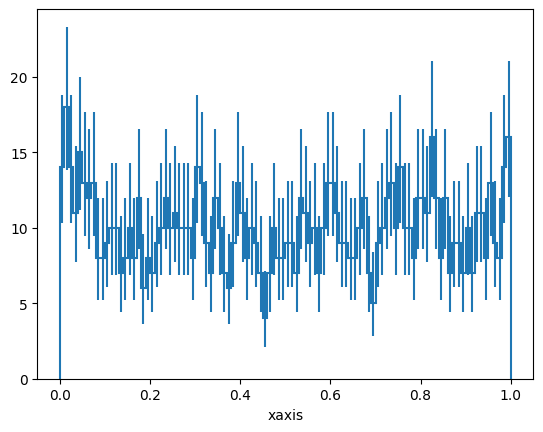

In [122]:
h.to_hist().plot()

Uproot histograms also satisfy the [UHI plotting protocol](https://uhi.readthedocs.io/en/latest/plotting.html), so they have methods like `values` (bin contents), `variances` (errors squared), and `axes`.

In [123]:
h.values()

array([14., 18., 14., 11., 15., 13., 12., 13.,  8.,  8.,  9., 10., 10.,
        7.,  8., 10.,  8., 12.,  6.,  8.,  7.,  9., 10., 12., 10., 11.,
       10., 10., 10.,  8., 14., 13.,  9.,  7., 12., 10.,  7.,  6.,  9.,
       13., 11.,  8., 10.,  9.,  7.,  4.,  7., 10.,  8.,  8.,  9.,  9.,
        7., 12., 11.,  9., 10.,  7., 10., 13., 13., 11.,  9.,  9.,  8.,
        8., 10., 12.,  7.,  5.,  9., 10., 12., 13., 10., 14., 10., 10.,
        8., 12., 12., 11., 16., 12.,  8., 12.,  7.,  9.,  9.,  7., 10.,
        7., 11., 11.,  8., 13.,  9.,  8., 14., 16.], dtype=float32)

In [124]:
h.variances()

array([14., 18., 14., 11., 15., 13., 12., 13.,  8.,  8.,  9., 10., 10.,
        7.,  8., 10.,  8., 12.,  6.,  8.,  7.,  9., 10., 12., 10., 11.,
       10., 10., 10.,  8., 14., 13.,  9.,  7., 12., 10.,  7.,  6.,  9.,
       13., 11.,  8., 10.,  9.,  7.,  4.,  7., 10.,  8.,  8.,  9.,  9.,
        7., 12., 11.,  9., 10.,  7., 10., 13., 13., 11.,  9.,  9.,  8.,
        8., 10., 12.,  7.,  5.,  9., 10., 12., 13., 10., 14., 10., 10.,
        8., 12., 12., 11., 16., 12.,  8., 12.,  7.,  9.,  9.,  7., 10.,
        7., 11., 11.,  8., 13.,  9.,  8., 14., 16.])

In [125]:
list(h.axes[0])  # "x", "y", "z" or 0, 1, 2

[array([0.  , 0.01]),
 array([0.01, 0.02]),
 array([0.02, 0.03]),
 array([0.03, 0.04]),
 array([0.04, 0.05]),
 array([0.05, 0.06]),
 array([0.06, 0.07]),
 array([0.07, 0.08]),
 array([0.08, 0.09]),
 array([0.09, 0.1 ]),
 array([0.1 , 0.11]),
 array([0.11, 0.12]),
 array([0.12, 0.13]),
 array([0.13, 0.14]),
 array([0.14, 0.15]),
 array([0.15, 0.16]),
 array([0.16, 0.17]),
 array([0.17, 0.18]),
 array([0.18, 0.19]),
 array([0.19, 0.2 ]),
 array([0.2 , 0.21]),
 array([0.21, 0.22]),
 array([0.22, 0.23]),
 array([0.23, 0.24]),
 array([0.24, 0.25]),
 array([0.25, 0.26]),
 array([0.26, 0.27]),
 array([0.27, 0.28]),
 array([0.28, 0.29]),
 array([0.29, 0.3 ]),
 array([0.3 , 0.31]),
 array([0.31, 0.32]),
 array([0.32, 0.33]),
 array([0.33, 0.34]),
 array([0.34, 0.35]),
 array([0.35, 0.36]),
 array([0.36, 0.37]),
 array([0.37, 0.38]),
 array([0.38, 0.39]),
 array([0.39, 0.4 ]),
 array([0.4 , 0.41]),
 array([0.41, 0.42]),
 array([0.42, 0.43]),
 array([0.43, 0.44]),
 array([0.44, 0.45]),
 array([0.

## Reading a TTree

A TTree represents a potentially large dataset. Getting it from the [uproot.ReadOnlyDirectory](https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html) only returns its TBranch names and types. The `show` method is a convenient way to list its contents:

In [126]:
t = file["T"]
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | Event                    | AsGroup(<TBranchElement 'ev...
event/TObject        | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
event/TObject/fUn... | uint32_t                 | AsDtype('>u4')
event/TObject/fBits  | uint32_t                 | AsDtype('>u4')
event/fType[20]      | int8_t[20]               | AsDtype("('i1', (20,))")
event/fEventName     | char*                    | AsStrings(length_bytes='4')
event/fNtrack        | int32_t                  | AsDtype('>i4')
event/fNseg          | int32_t                  | AsDtype('>i4')
event/fNvertex       | uint32_t                 | AsDtype('>u4')
event/fFlag          | uint32_t                 | AsDtype('>u4')
event/fTemperature   | float                    | AsDtype('>f4', 'float64')
event/fMeasures[10]  | int32_t[10]              | AsDtype

Be aware that you can get the same information from `keys` (an [uproot.TTree](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html) is dict-like), `typename`, and `interpretation`.

In [129]:
last_key = t.keys()[-1]
last_key, t[last_key].typename, t[last_key].interpretation

('event/fIsValid', 'bool', AsDtype('bool'))

(If an [uproot.TBranch](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html) has no `interpretation`, it can’t be read by Uproot.)

The most direct way to read data from an [uproot.TBranch](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html) is by calling its `array` method.

In [130]:
t["event/fNtrack"].array()

<Array [600, 604, 603, 594, 595, ..., 598, 600, 596, 593] type='1000 * int32'>

## Reading a… what is that?

This file also contains an instance of type [TProcessID](https://root.cern.ch/doc/master/classTProcessID.html). These aren’t typically useful in data analysis, but Uproot manages to read it anyway because it follows certain conventions (it has “class streamers”). It’s presented as a generic object with an `all_members` property for its data members (through all superclasses).

In [15]:
print(file["ProcessID0"])
print(file["ProcessID0"].all_members)

<TProcessID (version 1) at 0x000107e81600>
{'@fUniqueID': 0, '@fBits': 50331648, 'fName': 'ProcessID0', 'fTitle': '3ec87674-3aa2-11e9-bb02-0301a8c0beef'}


Here’s a more useful example of that: a supernova search with the IceCube experiment has custom classes for its data, which Uproot reads and represents as objects with `all_members`.

In [16]:
icecube = uproot.open(skhep_testdata.data_path("uproot-issue283.root"))
icecube.classnames()

{'config;1': 'TDirectory',
 'config/analysis;1': 'SN_Analysis_Configuration_t',
 'config/detector;1': 'I3Eval_t',
 'config/run;1': 'SN_File_t',
 'sn_all;1': 'TTree',
 'sn_gps;1': 'TTree',
 'sn_range;1': 'TTree',
 'sn_o2rout;1': 'TTree',
 'sn_o2cand;1': 'TTree',
 'sn_omwatch;1': 'TTree',
 'sn_sigsim;1': 'TTree'}

In [18]:
icecube["config/detector"].all_members

{'@fUniqueID': 0,
 '@fBits': 50331648,
 'theDataArray': <Sni3DataArray (version 1) at 0x000123317400>,
 'NumberOfChannels': 5160,
 'NoAvailableSlices': -1,
 'AvailableDataSize': 0,
 'mGPSCardId': 0,
 'mGPSPrescale': 20000000,
 'mGPSEventNo': 92824,
 'mScalerCardId': 0,
 'mScalerStartChannel': 0,
 'StartUTC': 272924620173109013,
 'MaxChannels': 5160,
 'mMaxJitterLogs': 20,
 'Channel': <I3Eval_t::ChannelContainer_t (version 1) at 0x000123317ac0>,
 'ChannelIDMap': <STLMap {46612627560: 896, ..., 281410180683757: 2689} at 0x00012347f3a0>,
 'BadChannelIDSet': <STLSet {58348614635591, 60068372029697, ..., 258905191174588} at 0x00012347f430>,
 'ChannelID': array([ 47303335284587,  20579555797555, 106634453247646, ...,
        255380957221937, 107432791511293, 280205879548048],
       shape=(5160,), dtype='>i8'),
 'Deadtime': array([250., 250., 250., ..., 250., 250., 250.],
       shape=(5160,), dtype='>f8'),
 'Efficiency': array([1.  , 1.  , 1.  , ..., 1.35, 1.35, 1.35],
       shape=(5160,),

In [19]:
icecube["config/detector"].all_members["ChannelIDMap"]

<STLMap {46612627560: 896, ..., 281410180683757: 2689} at 0x00012347f3a0>

# Writing data to a file

Uproot’s ability to *write* data is more limited than its ability to *read* data, but some useful cases are possible.

## Opening files for writing

First of all, a file must be opened for writing, either by creating a completely new file or updating an existing one.

In [20]:
output1 = uproot.recreate("completely-new-file.root")
# output2 = uproot.update("existing-file.root")

(Uproot cannot write over a network; output files must be local.)

## Writing strings and histograms

These uproot.WritableDirectory objects have a dict-like interface: you can put data in them by assigning to square brackets.

In [21]:
output1["some_string"] = "This will be a TObjString."

output1["some_histogram"] = file["hstat"]

import numpy as np

output1["nested_directory/another_histogram"] = np.histogram(
    np.random.normal(0, 1, 1000000)
)

In ROOT, the name of an object is a property of the object, but in Uproot, it’s a key in the TDirectory that holds the object, so that’s why the name is on the left-hand side of the assignment, in square brackets. Only the data types listed in the blue box [in the documentation](https://uproot.readthedocs.io/en/latest/basic.html#writing-objects-to-a-file) are supported: mostly just histograms.

## Writing TTrees

TTrees are potentially large and might not fit in memory. Generally, you’ll need to write them in batches.

One way to do this is to assign the first batch and extend it with subsequent batches:

In [22]:
import numpy as np

output1["tree1"] = {
    "x": np.random.randint(0, 10, 1000000),
    "y": np.random.normal(0, 1, 1000000),
}
output1["tree1"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
output1["tree1"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)

another is to create an empty TTree with [uproot.WritableDirectory.mktree](https://uproot.readthedocs.io/en/latest/uproot.writing.writable.WritableDirectory.html#mktree), so that every write is an extension.

In [23]:
output1.mktree("tree2", {"x": np.int32, "y": np.float64})
output1["tree2"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
output1["tree2"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)
output1["tree2"].extend(
    {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}
)

In general, it pays to write few large batches, rather than many small batches.

The only data types that can be assigned or passed to `extend` are listed in the blue box [in this documentation](https://uproot.readthedocs.io/en/latest/basic.html#writing-ttrees-to-a-file). This includes jagged arrays, but not more complex types.

## Reading and writing RNTuples

TTree has been the default format to store large datasets in ROOT files for decades. However, it has slowly become outdated and are not optimized for modern systems. This is where the RNTuple format comes in. It is a modern serialization format that is designed with modern systems in mind and is planned to replace TTree in the coming years. Version [1.0.0.0](https://cds.cern.ch/record/2923186) is out and will be supported “forever”.

RNTuples are much simpler than TTrees by design, and this time there is an official specification, which makes it much easier for third-party I/O packages like Uproot to support. Uproot already supports reading the full RNTuple specification, meaning that you can read any RNTuple you find in the wild. It also supports writing a large part of the specification, and intends to support as much as it makes sense for data analysis.

To ease the transition into RNTuples, we are designing the interface to match the one for TTrees as closely as possible. Let’s look at a simple example for reading and writing RNTuples.

In [44]:
filename = skhep_testdata.data_path("test_stl_containers_rntuple_v1-0-0-0.root")

file = uproot.open(filename)

This time, if we print the class names, we see that there is an RNTuple instead of a TTree.

In [45]:
file.classnames()

{'ntuple;1': 'ROOT::RNTuple'}

In [48]:
rntuple = file["ntuple"]
rntuple.keys(recursive=False)

['string',
 'vector_int32',
 'array_float',
 'vector_vector_int32',
 'vector_string',
 'vector_vector_string',
 'variant_int32_string',
 'vector_variant_int64_string',
 'tuple_int32_string',
 'pair_int32_string',
 'vector_tuple_int32_string',
 'lorentz_vector',
 'array_lv']

In [49]:
rntuple["vector_int32"].array()

<Array [[1], [1, 2], ..., [1, ..., 4], [1, 2, 3, 4, 5]] type='5 * var * int32'>

Writing again works in a very similar way to TTrees. However, since TTrees are still the default format used in more places, writing something like `file[key] = data` will default to writing the data as a TTree (but this will change in about 6 months!).

For now, when we want to write an RNTuple, we need to specifically tell Uproot that we want to do so.

In [29]:
data = {"my_int_data": [1, 2, 3], "my_float_data": [1.0, 2.0, 3.0]}
more_data = {"my_int_data": [4, 5, 6], "my_float_data": [4.0, 5.0, 6.0]}

output3 = uproot.recreate("new-file-with-rntuple.root")

rntuple = output3.mkrntuple("my_rntuple", data)
rntuple.extend(more_data)

For the rest of the tutorial we will mostly focus on TTrees since this is still the main data format that you’ll encounter for now.

## Exercise 1 (10 minutes)

There is a file in `skhep_testdata` named `"ntpl001_staff_rntuple_v1-0-0-0.root"` that contains CERN staff data from 1988. As the name suggests, it is an RNTuple and not a TTree.

1.  Open it with Uproot, look around at what's in there, and then find the number of French employees who were at least 35 years old, and had one or two children. For bonus points, use `with uproot.open(...) as f:` instead of `f = uproot.open(...)` to follow best practices.
2.  With the selection from the previous part, make a histogram of the employee grade with `np.histogram(np.array(data))`, and save it to a new ROOT file. (You need to wrap the data with `np.array` due to a bug I found while writing this.)
3.  Read back the file you just made. Open the histogram, use `to_hist()` to convert it to a `hist` histogram, and then plot it with `.plot()`.

<details>
<summary>
Solution
</summary>
<pre>
<code>
import skhep_testdata
import uproot
import numpy as np

with uproot.open(skhep_testdata.data_path("ntpl001_staff_rntuple_v1-0-0-0.root")) as file:
    staff = file["Staff"]
    staff_age = staff["Age"].array()
    staff_nation = staff["Nation"].array()
    staff_children = staff["Children"].array()
    staff_grade = staff["Grade"].array()

cut = (staff_nation == "FR") \
    & (staff_age >= 35) \
    & (1 <= staff_children) \
    & (2 >= staff_children)

n = len(staff_age[cut])

n = np.sum(cut) # A simpler alternative is to sum count the number of True values in cut

print(f"The number of employees with the selected criteria is {n}")

with uproot.recreate("my_file.root") as file:
    file["my_hist"] = np.histogram(np.array(staff_grade[cut]))

with uproot.open("my_file.root") as file:
    h = file["my_hist"].to_hist()

h.plot()
</code>
</pre>
</details>

In [98]:
# Write your code here


# ROOT file structure and terminology

A ROOT file ([ROOT TFile](https://root.cern.ch/doc/master/classTFile.html), [uproot.ReadOnlyFile](https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html)) is like a little filesystem containing nested directories ([ROOT TDirectory](https://root.cern.ch/doc/master/classTDirectory.html), [uproot.ReadOnlyDirectory](https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html)). In Uproot, nested directories are presented as nested dicts.

Any class instance ([ROOT TObject](https://root.cern.ch/doc/master/classTObject.html), [uproot.Model](https://uproot.readthedocs.io/en/latest/uproot.model.Model.html)) can be stored in a directory, including types such as histograms (e.g. [ROOT TH1](https://root.cern.ch/doc/master/classTH1.html), [uproot.behaviors.TH1.TH1](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TH1.TH1.html)).

One of these classes, TTree ([ROOT TTree](https://root.cern.ch/doc/master/classTTree.html), [uproot.TTree](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html)), is a gateway to large datasets. A TTree is roughly like a Pandas DataFrame in that it represents a table of data. The columns are called TBranches ([ROOT TBranch](https://root.cern.ch/doc/master/classTBranch.html), [uproot.TBranch](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html)), which can be nested (unlike Pandas), and the data can have any C++ type (unlike Pandas, which can store any Python type).

A TTree is often too large to fit in memory, and sometimes (rarely) even a single TBranch is too large to fit in memory. Each TBranch is therefore broken down into TBaskets ([ROOT TBasket](https://root.cern/doc/master/classTBasket.html), [uproot.models.TBasket.Model_TBasket](https://uproot.readthedocs.io/en/latest/uproot.models.TBasket.Model_TBasket.html)), which are "batches" of data. (These are the same batches that each call to `extend` writes in the previous lesson.) TBaskets are the smallest unit that can be read from a TTree: if you want to read the first entry, you have to read the first TBasket.

<center>
<img src="images/ttree-terminology.png" style="height:500px;"/>
</center>

As a data analyst, you’ll likely be concerned with TTrees and TBranches first-hand, but only TBaskets when efficiency issues come up. Files with large TBaskets might require a lot of memory to read; files with small TBaskets will be slower to read (in ROOT also, but especially in Uproot). Megabyte-sized TBaskets are usually ideal.

## Examples with a large TTree

[This file](http://opendata.web.cern.ch/record/12341) is 2.1 GB, hosted by CERN's Open Data Portal.

In [5]:
%pip install fsspec_xrootd
%conda install xrootd

Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import uproot

file = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
)
file.classnames()

{'Events;75': 'TTree', 'Events;74': 'TTree'}

(The `;75` and `;74` are internal indices that ROOT uses to keep track of overwritten objects.) You can ignore them most of the time.

Just asking for the [uproot.TTree](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html) object and printing it out *does not* read the whole dataset.

In [4]:
tree = file["Events"]
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge          | int32_t[]                | AsJagged(AsDtype('>i4'))


## Reading part of a TTree

In the last lesson, we learned that the most direct way to read one TBranch is to call [uproot.TBranch.array](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html#array).

In [3]:
# You can run this, but it takes a long time
# tree["nMuon"].array()

However, it takes a long time because a lot of data have to be sent over the network.

To limit the amount of data read, set `entry_start` and `entry_stop` to the range you want. The `entry_start` is inclusive, `entry_stop` exclusive, and the first entry would be indexed by `0`, just like slices in an array interface (first lesson). Uproot only reads as many TBaskets as are needed to provide these entries.

In [4]:
tree["nMuon"].array(entry_start=1_000, entry_stop=2_000)

<Array [2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 4, 4, 1, 3, 4, 3] type='1000 * uint32'>

These are the building blocks of a parallel data reader: each is responsible for a different slice. (See also [uproot.TTree.num_entries_for](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#num-entries-for) and [uproot.TTree.common_entry_offsets](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#common-entry-offsets), which can be used to pick `entry_start`/`entry_stop` in optimal ways.)

## Reading multiple TBranches at once

Suppose you know that you will need all of the muon TBranches. Asking for them in one request is more efficient than asking for each TBranch individually because the server can be working on reading the later TBaskets from disk while the earlier TBaskets are being sent over the network to you. Whereas a TBranch has an `array` method, the TTree has an `arrays` (plural) method for getting multiple arrays.

In [5]:
muons = tree.arrays(
    ["Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", "Muon_charge"], entry_stop=1_000
)
muons

<Array [{Muon_pt: [...], ...}, ..., {...}] type='1000 * {Muon_pt: var * flo...'>

Now all five of these TBranches are in the output, `muons`, which is an Awkward Array. An Awkward Array of multiple TBranches has a dict-like interface, so we can get each variable from it by

In [6]:
muons["Muon_pt"]

<Array [[10.8, 15.7], ..., [28.9, 8.62, 4.51]] type='1000 * var * float32'>

## Beware! It's `tree.arrays` that actually reads the data!

If you're not careful with the [uproot.TTree.arrays](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#arrays) call, you could end up waiting a long time for data you don't want or you could run out of memory. Reading everything with

```python
everything = tree.arrays()
```
and then picking out the arrays you want is usually not a good idea. At the very least, set an `entry_stop`.

## Selecting TBranches by name

Suppose you have many muon TBranches and you don't want to list them all. The [uproot.TTree.keys](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#keys) and [uproot.TTree.arrays](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#arrays) both take a `filter_name` argument that can select them in various ways (see documentation). In particular, it's good to use the `keys` first, to know which branches match your filter, followed by `arrays`, to actually read them.

In [7]:
tree.keys(filter_name="Muon_*")

['Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [8]:
tree.arrays(filter_name="Muon_*", entry_stop=1_000)

<Array [{Muon_pt: [...], ...}, ..., {...}] type='1000 * {Muon_pt: var * flo...'>

(There are also `filter_typename` and `filter_branch` for more options.)

## Scaling up, making a plot

The best way to figure out what you're doing is to tinker with small datasets, and then scale them up. Here, we take 1000 events and compute dimuon masses.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x10f28c850>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

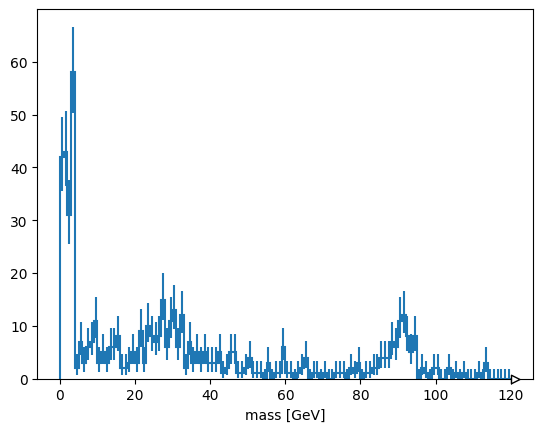

In [5]:
muons = tree.arrays(entry_stop=1_000)
cut = muons["nMuon"] == 2

pt0 = muons["Muon_pt", cut, 0]
pt1 = muons["Muon_pt", cut, 1]
eta0 = muons["Muon_eta", cut, 0]
eta1 = muons["Muon_eta", cut, 1]
phi0 = muons["Muon_phi", cut, 0]
phi1 = muons["Muon_phi", cut, 1]

import numpy as np

mass = np.sqrt(2 * pt0 * pt1 * (np.cosh(eta0 - eta1) - np.cos(phi0 - phi1)))

import hist

masshist = hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]"))
masshist.fill(mass)
masshist.plot()

That worked (there's a Z peak). Now to do this over the whole file, we should be more careful about what we're reading,

In [10]:
tree.keys(filter_name=["nMuon", "/Muon_(pt|eta|phi)/"])

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi']

and accumulate data gradually with [uproot.TTree.iterate](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#iterate). This handles the `entry_start`/`entry_stop` in a loop.

hi
8.920967104981892e-06
hi
1.745194657695911e-05
hi
2.638916316664953e-05
hi
3.6041357083515185e-05
hi
4.548230769916997e-05
hi
5.5215749039578266e-05
hi
6.47379470787757e-05
hi
7.448763790389252e-05
hi
8.352235140183411e-05
hi
9.306079892574006e-05


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x11fa81630>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

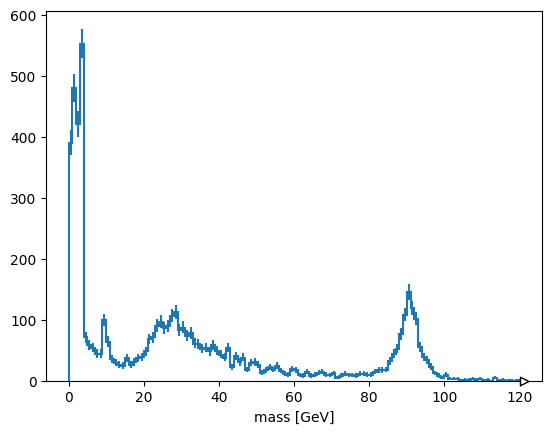

In [8]:
masshist = hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]"))

# Still set entry_stop because it takes a while
for muons in tree.iterate(filter_name=["nMuon", "/Muon_(pt|eta|phi)/"], step_size=1_000, entry_stop=10_000):
    cut = muons["nMuon"] == 2
    pt0 = muons["Muon_pt", cut, 0]
    pt1 = muons["Muon_pt", cut, 1]
    eta0 = muons["Muon_eta", cut, 0]
    eta1 = muons["Muon_eta", cut, 1]
    phi0 = muons["Muon_phi", cut, 0]
    phi1 = muons["Muon_phi", cut, 1]
    mass = np.sqrt(2 * pt0 * pt1 * (np.cosh(eta0 - eta1) - np.cos(phi0 - phi1)))
    masshist.fill(mass)
    print(masshist.sum() / tree.num_entries)

masshist.plot()

## Getting data into NumPy or Pandas

In all of the above examples, the `array`, `arrays`, and `iterate` methods return Awkward Arrays. The Awkward Array library is useful for exactly this kind of data (jagged arrays: more in the next lesson), but you might be working with libraries that only recognize NumPy arrays or Pandas DataFrames.

Use `library="np"` or `library="pd"` to get NumPy or Pandas, respectively.

In [9]:
tree["nMuon"].array(library="np", entry_stop=1_000)

array([ 2,  2,  1,  4,  4,  3,  2,  2,  2,  2,  2,  2,  6,  3,  2,  1,  2,
        2,  2,  2,  2,  5,  3,  3,  4,  2,  2,  2,  3,  2,  0,  2,  3,  2,
        3,  3,  2,  2,  2,  2,  2,  2,  3,  2,  3,  1,  3,  2,  5,  3,  1,
        5,  2,  2,  3,  2,  1,  2,  3,  2,  3,  2,  1,  1,  5,  2,  0,  2,
        1,  2,  1,  4,  2,  2,  2,  2,  4,  2,  1,  1,  2,  1,  2,  1,  1,
        2,  1,  5,  2,  1,  3,  3,  2,  2,  3,  4,  1,  2,  0,  2,  2,  2,
        2,  2,  1,  2,  2,  2,  4,  3,  2,  3,  2,  7,  2,  2,  2,  3,  4,
        2,  1,  0,  2,  3,  2,  2,  3,  2,  2,  1,  2,  2,  1,  4,  2,  2,
        5,  2,  3,  2,  2,  3,  5,  2,  1,  7,  3,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  4,  2,  3,  2,  0,  2,  1,  3,  2,  4,  5,  2,
        2,  2,  5,  2,  3,  2,  2,  3,  2,  4,  2,  1,  3,  0,  2,  2,  3,
        4,  2,  3,  3,  6,  2,  2,  2,  2,  2,  6,  2,  2,  1,  2,  2,  3,
        3,  2,  2,  2,  2,  2,  4,  2,  4,  2,  2,  2,  2,  4,  2,  2,  2,
        2,  2,  3,  2,  2

In [12]:
%pip install awkward-pandas

  Using cached awkward_pandas-2023.8.0-py3-none-any.whl.metadata (2.1 kB)
Using cached awkward_pandas-2023.8.0-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
tree.arrays(library="pd", entry_stop=1_000)

,nMuon,Muon_pt,Muon_eta,Muon_phi,Muon_mass,Muon_charge
0,2,"[10.763696670532227, 15.736522674560547]","[1.0668272972106934, -0.563786506652832]","[-0.03427272289991379, 2.5426154136657715]","[0.10565836727619171, 0.10565836727619171]","[-1, -1]"
1,2,"[10.538490295410156, 16.327096939086914]","[-0.42778006196022034, 0.34922507405281067]","[-0.2747921049594879, 2.539781332015991]","[0.10565836727619171, 0.10565836727619171]","[1, -1]"
2,1,[3.2753264904022217],[2.210855484008789],[-1.2234135866165161],[0.10565836727619171],[1]
3,4,"[11.429154396057129, 17.634033203125, 9.624728...","[-1.5882395505905151, -1.7511844635009766, -1....","[-2.0773041248321533, 0.25135836005210876, -2....","[0.10565836727619171, 0.10565836727619171, 0.1...","[1, 1, 1, 1]"
4,4,"[3.2834417819976807, 3.64400577545166, 32.9112...","[-2.1724836826324463, -2.18253493309021, -1.12...","[-2.3700082302093506, -2.3051390647888184, -0....","[0.10565836727619171, 0.10565836727619171, 0.1...","[-1, -1, 1, 1]"
...,...,...,...,...,...,...
995,3,"[22.06355094909668, 12.945415496826172, 13.397...","[1.9658242464065552, -0.1912732571363449, -0.1...","[0.3269919753074646, -2.6377272605895996, -2.6...","[0.10565836727619171, 0.10565836727619171, 0.1...","[1, -1, -1]"
996,2,"[10.052776336669922, 4.336074352264404]","[0.832908034324646, 1.9521838426589966]","[-1.5373767614364624, -0.07796303927898407]","[0.10565836727619171, 0.10565836727619171]","[-1, 1]"
997,3,"[4.36127233505249, 15.089585304260254, 12.3592...","[1.0476676225662231, -0.675965428352356, 0.749...","[2.1066837310791016, -2.155407190322876, 2.129...","[0.10565836727619171, 0.10565836727619171, 0.1...","[1, 1, -1]"
998,4,"[17.660253524780273, 4.613911151885986, 8.7928...","[0.5870140194892883, 1.287946343421936, 0.4992...","[-0.13344137370586395, -2.3934242725372314, -0...","[0.10565836727619171, 0.10565836727619171, 0.1...","[-1, -1, -1, -1]"


NumPy is great for non-jagged data like the `"nMuon"` branch, but it has to represent an unknown number of muons per event as an array of NumPy arrays (i.e. Python objects).

Pandas can be made to represent multiple particles per event by putting this structure in a [pd.MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html), but not when the DataFrame contains more than one particle type (e.g. muons *and* electrons). Use separate DataFrames for these cases. If it helps, note that there's another route to DataFrames: by reading the data as an Awkward Array and calling [ak.to_pandas](https://awkward-array.readthedocs.io/en/latest/_auto/ak.to_pandas.html) on it. (Some methods use more memory than others, and I've found Pandas to be unusually memory-intensive.)

Or use Awkward Arrays!

## Awkward Array

<center>
<img src="images/awkward-logo.png" style="height:300px;"/>
</center>

Awkward is a crucial package in Scikit-HEP, as it lets us work with jagged arrays with a NumPy-like syntax. It will be covered in detail on Wednesday, so I'll skip it here. 

<center>
<img src="images/cda.png" style="height:200px;"/>
</center>

# Histogram libraries

Mainstream Python has libraries for filling histograms.

## NumPy

NumPy, for instance, has an `np.histogram` function.

In [87]:
import skhep_testdata, uproot

tree = uproot.open(skhep_testdata.data_path("uproot-Zmumu.root"))["events"]

import numpy as np

np.histogram(tree["M"].array())

<Array [[172, 89, 29, 69, 277, ..., 24, 0, 2, 2], ...] type='2 * var * float64'>

Because of NumPy’s prominence, this 2-tuple of arrays (bin contents and edges) is a widely recognized histogram format, though it lacks many of the features high-energy physicists expect (under/overflow, axis labels, uncertainties, etc.).

## Matplotlib

Matplotlib also has a `plt.hist` function.

(array([ 172.,   89.,   29.,   69.,  277., 1640.,   24.,    0.,    2.,
           2.]),
 array([  0.38905792,  17.56032889,  34.73159987,  51.90287084,
         69.07414181,  86.24541279, 103.41668376, 120.58795473,
        137.75922571, 154.93049668, 172.10176766]),
 <BarContainer object of 10 artists>)

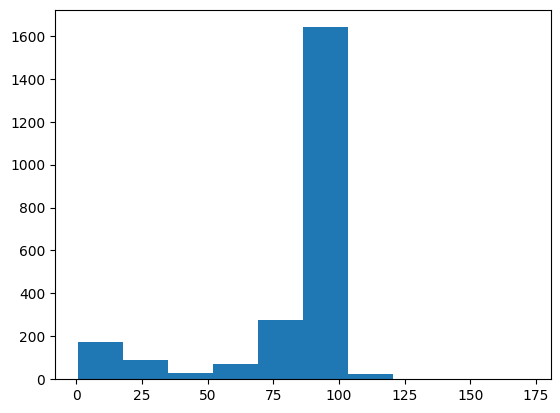

In [88]:
import matplotlib.pyplot as plt

plt.hist(tree["M"].array())

In addition to the same bin contents and edges as NumPy, Matplotlib includes a plottable graphic.

## Boost-histogram and hist

The main feature that these functions lack (without some effort) is refillability. High-energy physicists usually want to fill histograms with more data than can fit in memory, which means setting bin intervals on an empty container and filling it in batches (sequentially or in parallel).

Boost-histogram is a library designed for that purpose. It is intended as an infrastructure component. You can explore its “low-level” functionality upon importing it:

In [89]:
import boost_histogram as bh

A more user-friendly layer (with plotting, for instance) is provided by a library called `hist`.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1491c3c70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

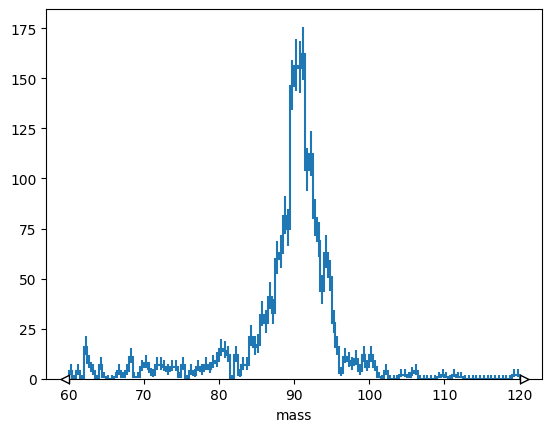

In [90]:
import hist

h = hist.Hist(hist.axis.Regular(120, 60, 120, name="mass"))

h.fill(tree["M"].array())

h.plot()

## Universal Histogram Indexing (UHI)

There is an attempt within Scikit-HEP to standardize what array-like slices mean for a histogram. ([See documentation](https://uhi.readthedocs.io/en/latest/indexing.html))

Naturally, integer slices should select a range of bins,

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x148e9a0e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

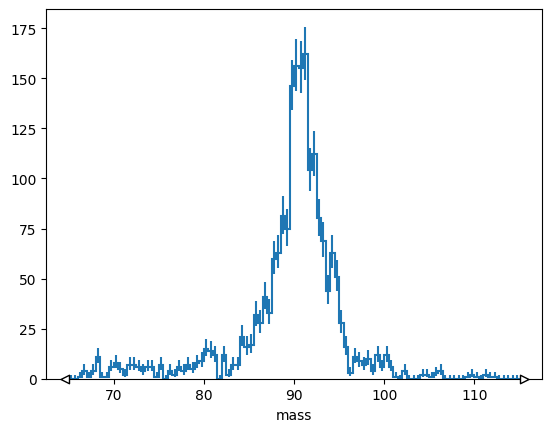

In [91]:
h[10:110].plot()

but often you want to select bins by coordinate value

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x11fca8d30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

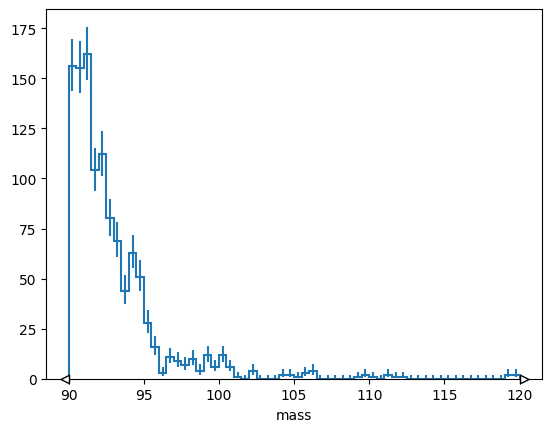

In [92]:
# Explicit version
# h[hist.loc(90) :].plot()

# Short version
h[90j:].plot()

or rebin by a factor,

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x13eb20250>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

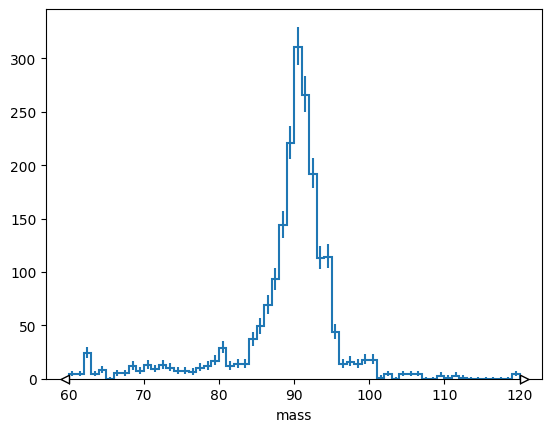

In [93]:
# Explicit version
# h[:: hist.rebin(2)].plot()

# Short version
h[::2j].plot()

or sum over a range.

In [94]:
# Explicit version
# h[hist.loc(80) : hist.loc(100) : sum]

# Short version
h[90j:100j:sum]

1102.0

Things get more interesting when a histogram has multiple dimensions.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1497f3940>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

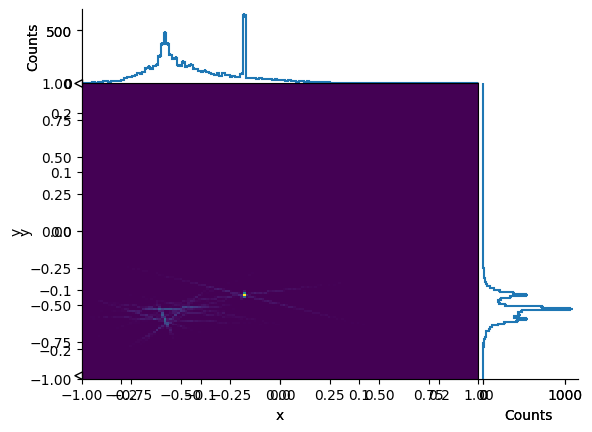

In [95]:
import uproot
import hist
import awkward as ak

picodst = uproot.open(
    "https://pivarski-princeton.s3.amazonaws.com/pythia_ppZee_run17emb.picoDst.root:PicoDst"
)

vertexhist = hist.Hist(
    hist.axis.Regular(600, -1, 1, label="x"),
    hist.axis.Regular(600, -1, 1, label="y"),
    hist.axis.Regular(40, -200, 200, label="z"),
)

vertex_data = picodst.arrays(filter_name="*mPrimaryVertex[XYZ]")

vertexhist.fill(
    ak.flatten(vertex_data["Event.mPrimaryVertexX"]),
    ak.flatten(vertex_data["Event.mPrimaryVertexY"]),
    ak.flatten(vertex_data["Event.mPrimaryVertexZ"]),
)

vertexhist[:, :, sum].plot2d_full()
vertexhist[-0.25j:0.25j, -0.25j:0.25j, sum].plot2d_full()
vertexhist[sum, sum, :].plot()
vertexhist[-0.25j:0.25j:sum, -0.25j:0.25j:sum, :].plot()

A histogram object can have more dimensions than you can reasonably visualize—you can slice, rebin, and project it into something visual later.

# Exercise 2 (10 minutes)

Let's go back to the big file we were using above. We restricted to events with exactly two muons and computed the dimuon masses. Now, we will use Awkward array to consider all possible combinations of two muons in each event. We will compute the masses and plot them. We have some code that does this below.

Make the following modifications to the code below.
1. Restrict to only muons of opposite charge.
2. Zoom in on the Z-peak and do some rebinning until you like how it looks.
3. If you have time, try to pick only the pair of muons with opposite charge with a mass closest to the Z boson (91 GeV). Hint: You'll need `ak.argmin` with `keepdims=True`.

<details>
<summary>
Solution
</summary>
For 1, you can use <code>cut = (mu1.charge != mu2.charge)</code>. For 2, it's up to you, but it would be something like <code>h[80j:100j:2j].plot()</code>. For 3, you can use <code>which = ak.argmin(abs(mass - zmass), axis=1, keepdims=True)</code>.
</details>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1383c5db0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

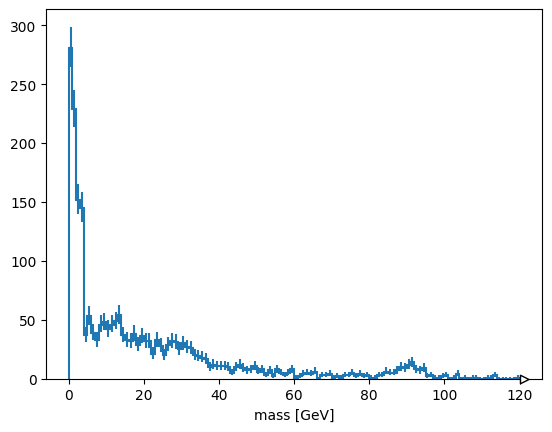

In [18]:
# Modify this code

import uproot
import awkward as ak
import numpy as np

file = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/derived-data/AOD2NanoAODOutreachTool/Run2012BC_DoubleMuParked_Muons.root"
)
tree = file["Events"]

arrays = tree.arrays(filter_name="/Muon_(pt|eta|phi|charge)/", entry_stop=1_000)

muons = ak.zip(
    {
        "pt": arrays["Muon_pt"],
        "eta": arrays["Muon_eta"],
        "phi": arrays["Muon_phi"],
        "charge": arrays["Muon_charge"],
    }
)

# Construct all possible pairs
pairs = ak.combinations(muons, 2)

# Separate them into first and second muon
mu1, mu2 = ak.unzip(pairs)

mass = np.sqrt(
    2 * mu1.pt * mu2.pt * (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
)

# mass is a jagged array, so we need to flatten/ravel it in order to construct the histogram
h = hist.Hist(hist.axis.Regular(120, 0, 120, label="mass [GeV]"))
h.fill(ak.ravel(mass))
h.plot()

# Now let's take a quick look at a few other packages in Scikit-HEP

## Lorentz vectors

In keeping with the “many small packages” philosophy, 2D/3D/Lorentz vectors are handled by a package named Vector. This is where you can find calculations like `deltaR` and coordinate transformations.

In [96]:
import vector

one = vector.obj(px=1, py=0, pz=0)
two = vector.obj(px=0, py=1, pz=1)

In [97]:
one + two

MomentumObject3D(px=1, py=1, pz=1)

In [98]:
one.deltaR(two)

np.float64(1.8011719796199461)

In [99]:
one.to_rhophieta()

MomentumObject3D(pt=1.0, phi=0.0, eta=0.0)

In [100]:
two.to_rhophieta()

MomentumObject3D(pt=1.0, phi=1.5707963267948966, eta=0.881373587019543)

To fit in with the rest of the ecosystem, Vector must be an array-oriented library. Arrays of 2D/3D/Lorentz vectors are processed in bulk.

MomentumNumpy2D, MomentumNumpy3D, MomentumNumpy4D are NumPy array subtypes: NumPy arrays can be cast to these types and get all the vector functions.

In [101]:
import skhep_testdata, uproot
import awkward as ak
import vector

tree = uproot.open(skhep_testdata.data_path("uproot-Zmumu.root"))["events"]

one = ak.to_numpy(tree.arrays(filter_name=["E1", "p[xyz]1"]))
two = ak.to_numpy(tree.arrays(filter_name=["E2", "p[xyz]2"]))

In [102]:
one.dtype.names = ("E", "px", "py", "pz")
two.dtype.names = ("E", "px", "py", "pz")

In [103]:
one = one.view(vector.MomentumNumpy4D)
two = two.view(vector.MomentumNumpy4D)

In [104]:
one + two

MomentumNumpy4D([( -7.0508504 ,   1.31371932, -116.3919462 , 142.82374098),
                 ( -6.07723788,   0.86288157, -117.74020834, 144.54679534),
                 ( -5.76527367,   0.72893471, -117.22250173, 143.92770728), ...,
                 (-35.664423  , -24.9064416 , -226.76744871, 250.05025691),
                 (-36.41664408, -25.19899466, -228.38003444, 251.853268  ),
                 (-36.30874217, -25.19705013, -228.65597631, 252.14934978)],
                shape=(2304,), dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('t', '<f8')])

In [105]:
one.deltaR(two)

array([3.10530402, 3.10550819, 3.10547199, ..., 2.81363587, 2.81359933,
       2.81354694], shape=(2304,))

In [106]:
one.to_rhophieta()

MomentumNumpy3D([(44.7322,  2.74126  , -1.21769), (38.8311, -0.440873 , -1.05139),
                 (38.8311, -0.440873 , -1.05139), ...,
                 (32.3997,  0.0370275, -1.57044), (32.3997,  0.0370275, -1.57044),
                 (32.5076,  0.0369644, -1.57078)],
                shape=(2304,), dtype=[('rho', '<f8'), ('phi', '<f8'), ('eta', '<f8')])

After `vector.register_awkward()` is called, `"Momentum2D"`, `"Momentum3D"`, `"Momentum4D"` are record names that Awkward Array will recognize to get all the vector functions.

In [107]:
vector.register_awkward()

tree = uproot.open(skhep_testdata.data_path("uproot-HZZ.root"))["events"]

array = tree.arrays(filter_name=["Muon_E", "Muon_P[xyz]"])

muons = ak.zip(
    {"px": array.Muon_Px, "py": array.Muon_Py, "pz": array.Muon_Pz, "E": array.Muon_E},
    with_name="Momentum4D",
)
mu1, mu2 = ak.unzip(ak.combinations(muons, 2))

In [108]:
mu1 + mu2

<MomentumArray4D [[{x: -15.2, y: -11, z: ..., ...}], ...] type='2421 * var ...'>

In [109]:
mu1.deltaR(mu2)

<Array [[2.95], [], [2.13], ..., [], [], []] type='2421 * var * float32'>

## Particle properties and PDG identifiers

The Particle library provides all of the particle masses, decay widths and more from the PDG. It further contains a series of tools to programmatically query particle properties and use several identification schemes.

In [110]:
import particle
from hepunits import GeV

In [111]:
particle.Particle.findall("pi")

[<Particle: name="pi0", pdgid=111, mass=134.9768 ± 0.0005 MeV>,
 <Particle: name="pi+", pdgid=211, mass=139.57039 ± 0.00018 MeV>,
 <Particle: name="pi-", pdgid=-211, mass=139.57039 ± 0.00018 MeV>,
 <Particle: name="pi(2)(1670)0", pdgid=10115, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(2)(1670)+", pdgid=10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(2)(1670)-", pdgid=-10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(1300)0", pdgid=100111, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1300)+", pdgid=100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1300)-", pdgid=-100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1)(1400)0", pdgid=9000113, mass=None>,
 <Particle: name="pi(1)(1400)+", pdgid=9000213, mass=None>,
 <Particle: name="pi(1)(1400)-", pdgid=-9000213, mass=None>,
 <Particle: name="pi(1800)0", pdgid=9010111, mass=1810 + 9 - 11 MeV>,
 <Particle: name="pi(1)(1600)0", pdgid=9010113, mass=1645 + 40 - 17 MeV>,
 <Particle: name="pi(1800)+", pdgid=9010211, mass=

In [112]:
z_boson = particle.Particle.from_name("Z0")
z_boson.mass / GeV, z_boson.width / GeV

(91.188, 2.4955)

In [113]:
print(z_boson.describe())

Name: Z0             ID: 23           Latex: $Z^{0}$
Mass  = 91188.0 ± 2.0 MeV
Width = 2495.5 ± 2.3 MeV
Q (charge)        = 0       J (total angular) = 1.0      P (space parity) = None
C (charge parity) = None    I (isospin)       = None     G (G-parity)     = None
    Antiparticle name: Z0 (antiparticle status: Same)


In [114]:
particle.Particle.from_pdgid(111)

<Particle: name="pi0", pdgid=111, mass=134.9768 ± 0.0005 MeV>

In [115]:
particle.Particle.findall(
    lambda p: p.pdgid.is_meson and p.pdgid.has_strange and p.pdgid.has_charm
)

[<Particle: name="D(s)+", pdgid=431, mass=1968.35 ± 0.07 MeV>,
 <Particle: name="D(s)-", pdgid=-431, mass=1968.35 ± 0.07 MeV>,
 <Particle: name="D(s)*+", pdgid=433, mass=2112.2 ± 0.4 MeV>,
 <Particle: name="D(s)*-", pdgid=-433, mass=2112.2 ± 0.4 MeV>,
 <Particle: name="D(s2)*(2573)+", pdgid=435, mass=2569.1 ± 0.8 MeV>,
 <Particle: name="D(s2)*(2573)-", pdgid=-435, mass=2569.1 ± 0.8 MeV>,
 <Particle: name="D(s0)*(2317)+", pdgid=10431, mass=2317.8 ± 0.5 MeV>,
 <Particle: name="D(s0)*(2317)-", pdgid=-10431, mass=2317.8 ± 0.5 MeV>,
 <Particle: name="D(s1)(2536)+", pdgid=10433, mass=2535.11 ± 0.06 MeV>,
 <Particle: name="D(s1)(2536)-", pdgid=-10433, mass=2535.11 ± 0.06 MeV>,
 <Particle: name="D(s1)(2460)+", pdgid=20433, mass=2459.5 ± 0.6 MeV>,
 <Particle: name="D(s1)(2460)-", pdgid=-20433, mass=2459.5 ± 0.6 MeV>]

In [116]:
print(particle.PDGID(211).info())

A              None
J              0.0
L              0
S              0
Z              None
abspid         211
charge         1.0
has_bottom     False
has_charm      False
has_down       True
has_fundamental_anti False
has_strange    False
has_top        False
has_up         True
is_Qball       False
is_Rhadron     False
is_SUSY        False
is_baryon      False
is_diquark     False
is_dyon        False
is_excited_quark_or_lepton False
is_gauge_boson_or_higgs False
is_generator_specific False
is_hadron      True
is_lepton      False
is_meson       True
is_nucleus     False
is_pentaquark  False
is_quark       False
is_sm_gauge_boson_or_higgs False
is_sm_lepton   False
is_sm_quark    False
is_special_particle False
is_technicolor False
is_valid       True
j_spin         1
l_spin         1
s_spin         1
three_charge   3



## Jet clustering

In a high-energy pp collision, for instance, a spray of hadrons is produced which is clustered into "jets" of particles and this method/process is called jet-clustering. The anti-kt jet clustering algorithm is one such algorithm used to combine particles/hadrons that are close to each other into jets.

Some people need to do jet-clustering at the analysis level. The fastjet package makes it possible to do that an (Awkward) array at a time.

In [52]:
%pip install fastjet

Note: you may need to restart the kernel to use updated packages.


In [117]:
import skhep_testdata, uproot
import awkward as ak
import particle
from hepunits import GeV
import vector

vector.register_awkward()

picodst = uproot.open(
    "https://pivarski-princeton.s3.amazonaws.com/pythia_ppZee_run17emb.picoDst.root:PicoDst"
)
px, py, pz = ak.unzip(
    picodst.arrays(filter_name=["Track/Track.mPMomentum[XYZ]"], entry_stop=100)
)

probable_mass = particle.Particle.from_name("pi+").mass / GeV

pseudojets = ak.zip(
    {"px": px, "py": py, "pz": pz, "mass": probable_mass}, with_name="Momentum4D"
)
good_pseudojets = pseudojets[pseudojets.pt > 0.1]

import fastjet

jetdef = fastjet.JetDefinition(fastjet.antikt_algorithm, 1.0)

clusterseq = fastjet.ClusterSequence(good_pseudojets, jetdef)
clusterseq.inclusive_jets()

ak.num(good_pseudojets), ak.num(clusterseq.inclusive_jets())


(<Array [24, 19, 13, 36, 39, 48, ..., 57, 41, 35, 34, 20, 93] type='100 * int64'>,
 <Array [8, 6, 6, 7, 8, 9, 8, 7, ..., 9, 8, 7, 6, 7, 4, 11] type='100 * int64'>)

This fastjet package uses Vector to get coordinate transformations and all the Lorentz vector methods you’re accustomed to having in pseudo-jet objects. I used Particle to impute the mass of particles with only track-level information.

See how all the pieces accumulate?

# Scaling up

The tools described today are intended to be used within a script that is scaled up for large datasets.

The Coffea project collects provides an easy way to use all these tools in a distributed way so that you can perform large data analysis on a large compute grid.

<center>
<img src="images/coffea_logo.svg" style="height:200px;"/>
</center>

This topic is too large to cover here, but we refer you to the [Coffea documentation](https://coffea-hep.readthedocs.io).

# Summary

- There are a variety of Python tools for HEP, each with a very specific task.
- All these tools work together to create an ecosystem.
- You have the flexibility of picking whatever is right for your analysis.